In [5]:
import numpy
import matplotlib.pyplot as plt
from numpy import zeros
import time

In [6]:
from scipy.stats import qmc

In [7]:
sample = LHS_1.random(n=4)
plt.figure(figsize=[6, 6])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(sample[:, 0], sample[:, 1], c='r')

for i in numpy.arange(0, 1, 1/4):
    plt.axvline(i)
    plt.axhline(i)
    

plt.show()

NameError: name 'LHS_1' is not defined

In [ ]:
def LHS(n, p, sx=0, dx=0):
    
    sx = numpy.arange(0, n)/n
    dx = numpy.arange(1, n+1)/n
    
    punti = numpy.random.uniform(low = sx, high= dx, size=[p,n]).T
    
    for j in range(p):
        numpy.random.shuffle(punti[:, j])
    
    return punti

In [ ]:
sample = LHS(n=20, p=2)
"""plt.figure(figsize=[6, 6])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(sample[:, 0], sample[:, 1], c='r')

for i in numpy.arange(0, 1, 1/4):
    plt.axvline(i)
    plt.axhline(i)

plt.show()"""

"plt.figure(figsize=[6, 6])\nplt.xlim([0, 1])\nplt.ylim([0, 1])\nplt.scatter(sample[:, 0], sample[:, 1], c='r')\n\nfor i in numpy.arange(0, 1, 1/4):\n    plt.axvline(i)\n    plt.axhline(i)\n\nplt.show()"

In [ ]:
q = numpy.logspace(1,5,20, dtype=int)
#n_int = 10
n_test = 10

In [ ]:
def addLHS(points, M):
    ex_time = 0 #<-----------------------------------------------------------
    for g in range(n_test):
        n = points.shape[0]
        p = points.shape[1]

        sx = numpy.arange(0, n*M)/(n*M)
        dx = numpy.arange(1, n*M+1)/(n*M)
        punti = numpy.random.uniform(low = sx, high= dx, size=[p, n*M]).T
        numpy.random.shuffle(punti[:, 1])
        numpy.random.shuffle(punti[:, 0])

        a = zeros((n*M, p)) 

        j=0 
        start = time.perf_counter() #<-------------------------------------------------------------------------
        for i in range(0, n*M):
            for t in range(0, n):
                for k in range(0,n*M): 
                    if ((punti[i, j]>sx[k]) and (punti[i, j]<dx[k]) and (points[t, j]>sx[k]) and (points[t, j]<dx[k])): 
                        punti[i, :] = sample[t, :]
        for j in range(1, p):
            for s in range(0, n*M):
                for r in range(0, n*M):
                    if ((punti[s, j]>sx[r]) and (punti[s, j]<dx[r])):
                        a[r, j] = True      
        for i in range(0, n*M): 
            for t in range(0, n): 
                if (punti[i, j]==points[t, j]):
                    break
                else:
                    for k in range(0,n*M):
                        if ((punti[i, j]>sx[k]) and (punti[i, j]<dx[k]) and (points[t, j]>sx[k]) and (points[t, j]<dx[k])):                      
                            for h in range(0, n*M):
                                if (a[h, j]==False):
                                    a[h, j]=True
                                    punti[i, j]=numpy.random.uniform(low=sx[h], high=dx[h])
                                    break
            ex_time += time.perf_counter() - start #<-------------------------------------------------------------------------
        print(l/20)
    ex_time /= n_test #<------------------------------------------------------------------------------
 
    return ex_time

In [ ]:
%%time
prova = []
for l in range(q.shape[0]):
    sample = LHS(n=q[l], p=2)
    prova += [addLHS(sample, 2)]

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

ax.plot(q, prova, label='replace')
#ax.plot(n, ex_time_Vec, label='Vec')
ax.set_xlabel(r'$n_{points}$')
ax.set_ylabel(r'$time\,\,[s]$')
ax.set_title(f'Mean execution time over {n_test} tests')
ax.semilogx()
ax.semilogy()
ax.legend()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15


KeyboardInterrupt: 

In [ ]:
def addLHS1(points, M):
    ex_time = numpy.zeros(q.shape[0])
    n = points.shape[0]
    p = points.shape[1]
    
    sx = numpy.arange(0, n*M)/(n*M)
    dx = numpy.arange(1, n*M+1)/(n*M)
    
    bol = zeros((n*M, p)) #matrice i cui elementi sono True o False a seconda se la riga o la colonna è occupata

    punti = zeros((n*M, p)) #nuova matrice dei punti
    
    #riempimento nuova matrice dei punti: da 0 a n-1 è point da n a n*M è 0

    punti[0:n, :] = points[0:n, :]
    start = time.time(6)        
    for j in range(0, p):
        bol[0:n*M, j] = False
        for i in range(n, n*M):
            for k in range(0, n*M): #controllo colonne e righe
                if (bol[k, j]==False):
                    for s in range(0, n*M): #controllo entrate da 0 a n*M di punti
                        if((punti[s,j]>sx[k]) and (punti[s, j]<dx[k])): #se il punto è nella kappesima colonna o riga allora la kappesima entrata di bol diventa True
                            bol[k, j] = True
            for t in range(0, n*M): #inserimento punti nelle colonne o righe vuote
                if (bol[t, j]==False): #se la t-esima colonna o riga è vuota genera un punto in quella
                    bol[t, j] = True
                    punti[i, j] = numpy.random.uniform(low=sx[t], high=dx[t]) #genera un punto che sia nella colonna o riga vuota e poi passa all'entrata di punti successiva
                    break
                    
    for j in range(p):
        numpy.random.shuffle(punti[n:n*M, j])
        
    return punti              

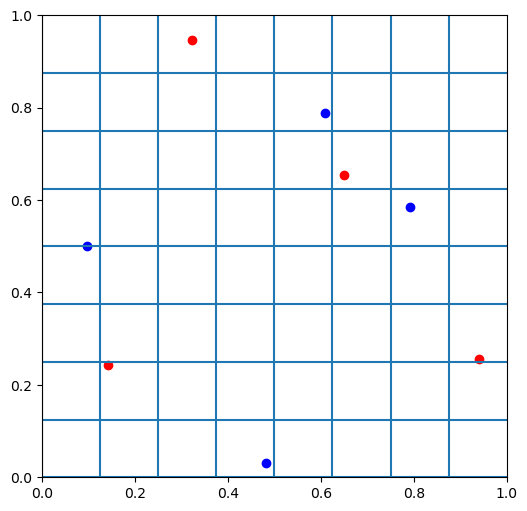

Wall time: 257 ms


In [ ]:
%%time
prova1 = addLHS1(sample, 2)
plt.figure(figsize=[6, 6])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(prova1[0:4, 0], prova1[0:4, 1], c='r')
plt.scatter(prova1[4:4*2, 0], prova1[4:4*2, 1], c='b')

for i in numpy.arange(0, 1, 1/8):
    plt.axvline(i)
    plt.axhline(i)

plt.show()

In [ ]:
#\usepackaging[eulermath, pdfspacing]{classicthesis}

In [ ]:
def SLHS(n, p, T):
    # step 1: genero la lista LHS_k le cui entrate sono slices, ovvero LH di dimensione m*p
    
    m = int(n/T)
    
    LHS_k = []
    
    for _ in range(0, T):
        slices = LHS_1.random(m)
        LHS_k.append(slices)
        
    #step 2: divido lo spazio in m intervalli e controllo in quali di essi si trovano i punti generati assegnandogli un indice. Creo le matrici A_k contenente gli indici 
    
    sx = numpy.arange(0, m)/(m)
    dx = numpy.arange(1, m+1)/(m)
    
    M = []
    A_k=zeros((m, p))
    
    for t in range (0, T):
        M.append(A_k)
        
    for t in range (0, T):
        for i in range(0, m):
            for j in range(0, p):
                for k in range(0, m):
                    if ((LHS_k[t][i,j]>sx[k]) & (LHS_k[t][i,j]<dx[k])):
                        A_k[i, j] = k
        M[t] = numpy.copy(A_k)
        
    L = numpy.vstack(M)
    
    #step 3: trovo tutti gli elementi uguali nelle colonne di L e li sostituisco con una permutazione di interi {(q-1)*T+1,...,q*T}
    
    new_index = zeros((n, p))
    
    for j in range(p): #ciclo sulle dimensioni
        for q in range(m): #ciclo sugli indici di colonna : passa uno per uno i vecchi indici
            perm = numpy.arange(q*T, (q+1)*T) 
            numpy.random.shuffle(perm)
            t = 0
            for i in range(n):  
                if (L[i, j] == q):
                    new_index[i, j] = perm[t]
                    t = t+1
    
    #step 4 : genero dei punti casualmente nei riquadri indicati dalla matrice new_index
    
    sx = numpy.arange(0, n)/(n)
    dx = numpy.arange(1, n+1)/(n)
    
    slices_LHS = zeros((n, p))
            
    for j in range(p):
        for i in range(n):
            slices_LHS[i, j] = numpy.random.uniform(low=sx[int(new_index[i, j])], high = dx[int(new_index[i, j])])
    
    return slices_LHS

In [ ]:
print(a)

NameError: name 'a' is not defined

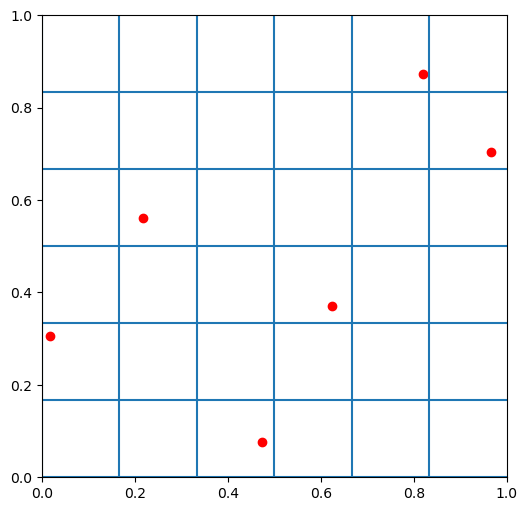

In [ ]:
a = SLHS(6, 2, 3)
plt.figure(figsize=[6, 6])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(a[:, 0], a[:, 1], c='r')

for i in numpy.arange(0, 1, 1/6):
    plt.axvline(i)
    plt.axhline(i)

plt.show()

In [ ]:
print(a) #dx

[[0.21786736 0.5606887 ]
 [0.62358589 0.37111349]
 [0.96638345 0.7043611 ]
 [0.01722387 0.30487978]
 [0.81870653 0.87320906]
 [0.47323825 0.07727321]]


In [ ]:
print(a) #slices

[[0.21786736 0.5606887 ]
 [0.62358589 0.37111349]
 [0.96638345 0.7043611 ]
 [0.01722387 0.30487978]
 [0.81870653 0.87320906]
 [0.47323825 0.07727321]]


In [ ]:
print(a) #L

[[0.21786736 0.5606887 ]
 [0.62358589 0.37111349]
 [0.96638345 0.7043611 ]
 [0.01722387 0.30487978]
 [0.81870653 0.87320906]
 [0.47323825 0.07727321]]


In [ ]:
print(a)

[[0.21786736 0.5606887 ]
 [0.62358589 0.37111349]
 [0.96638345 0.7043611 ]
 [0.01722387 0.30487978]
 [0.81870653 0.87320906]
 [0.47323825 0.07727321]]


In [ ]:
def lhs_in_LHS(points, M):
    n = points.shape[0]
    p = points.shape[1]
    
    sx = [numpy.arange(0, n*M)/(n*M) for _ in range(p)]
    dx = [numpy.arange(1, n*M+1)/(n*M) for _ in range(p)]
    
    index = [[] for _ in range(0, p)] #matrice che contiene gli indici delle colonne o righe occupate

    punti = zeros((n*M, p)) #nuova matrice dei punti
    
    for i in range(0, n): #riempimento della nuova matrice
        punti[i, :] = points[i, :]
    
    for j in range (0, p):
        for k in range(0, n*M): #controllo le righe o colonne
            for i in range(0, n*M): #controllo i punti
                if ((punti[i, j] > sx[j][k]) & (punti[i, j] < dx[j][k])):
                    index[j].append(k)
    

    sx = numpy.delete(sx, index)
    dx = numpy.delete(dx, index)
            
    return index

In [ ]:
w = lhs_in_LHS(sample, 2)
w

[[0, 2, 5, 6, 8, 10, 13, 14, 16, 18], [0, 2, 5, 7, 8, 11, 13, 15, 17, 19]]

In [ ]:
T = 6
for q in range(4):
    perm = numpy.arange(q*T, (q+1)*T)
    numpy.random.shuffle(perm)
    print(perm)

[4 0 3 2 5 1]
[11 10  8  9  6  7]
[13 16 15 14 12 17]
[21 20 22 19 23 18]


In [ ]:
sx = numpy.arange(0, 10)
dx = numpy.arange(1, 11)

a = numpy.array([1.4 , 3.7 , 7.1 , 4.2 , 0, 0, 0, 0, 0, 0])

index = []

for i in range(0, 10):
    for j in range(0, 10):
        if ((a[j] > sx[i]) & (a[j] < dx[i])):
            index.append(i)
                
sx = numpy.delete(sx, index)
dx = numpy.delete(dx, index)

print(dx)
print(sx)
print(index)

[ 1  3  6  7  9 10]
[0 2 5 6 8 9]
[1, 3, 4, 7]


In [ ]:
b = numpy.arange(0, 15)
a = numpy.random.shuffle(b)
b

array([ 8,  5,  2,  4, 10,  9, 11, 12, 14,  0,  1,  6,  3,  7, 13])